In [1]:
from yellowbrick.features import Rank2D
from yellowbrick.datasets import load_occupancy
from yellowbrick.datasets import load_bikeshare
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import CVScores
from yellowbrick.regressor import PredictionError

from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts

In [2]:
X, y = load_bikeshare()

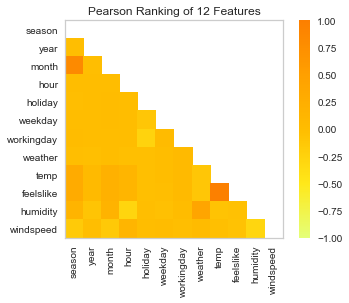

In [3]:
visualizer = Rank2D(algorithm="pearson", colormap="Wistia")
visualizer.fit_transform(X)
visualizer.poof()

In [4]:
model = Ridge()

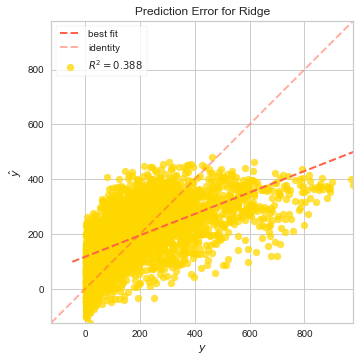

In [5]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

visualizer = PredictionError(model, size=(600,400), point_color="gold", line_color="tomato")

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=12.
  % (min_groups, self.n_splits)), Warning)


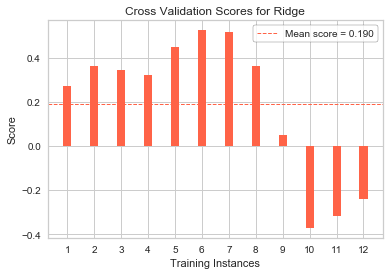

In [6]:
cv = StratifiedKFold(n_splits=12, random_state=42)
visualizer = CVScores(model, cv=cv, scoring='r2', color="tomato")
visualizer.fit(X, y)
visualizer.poof()